<center><h1>Hou_Shengtao_HW2</h1></center>
<br>
<br>

Name: Shengtao Tony Hou
<br>
Github Username: Tonyhou521 
<br>
USC ID: 9712707229

Using One Late Day!

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [563]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

Get the Cycle Power Plant Data Set

In [564]:
data = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')

### (b) Exploring the data

#### i. rows and columns

In [565]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


There are 9568 rows in this dataset, and there are 5 Columns. Each row is a individual data point collected from a Combined Cycle Power Plant when the power plant was set to work with full load. The columns represent features and target, with the AT,V,AP,RH being the features and PE being the target. 

AT is Ambient Temperature, AP is Ambient Pressure, RH is Relative Humidity and V is Exhaust Vaccum.

Together these 4 features(Predictors, Independent Vars) helps predict the target:

PE is the target(Dependent Var) and represnts the net hourly electrical energy output of the plant.

#### ii. pairwise scatterplots of all the varianbles

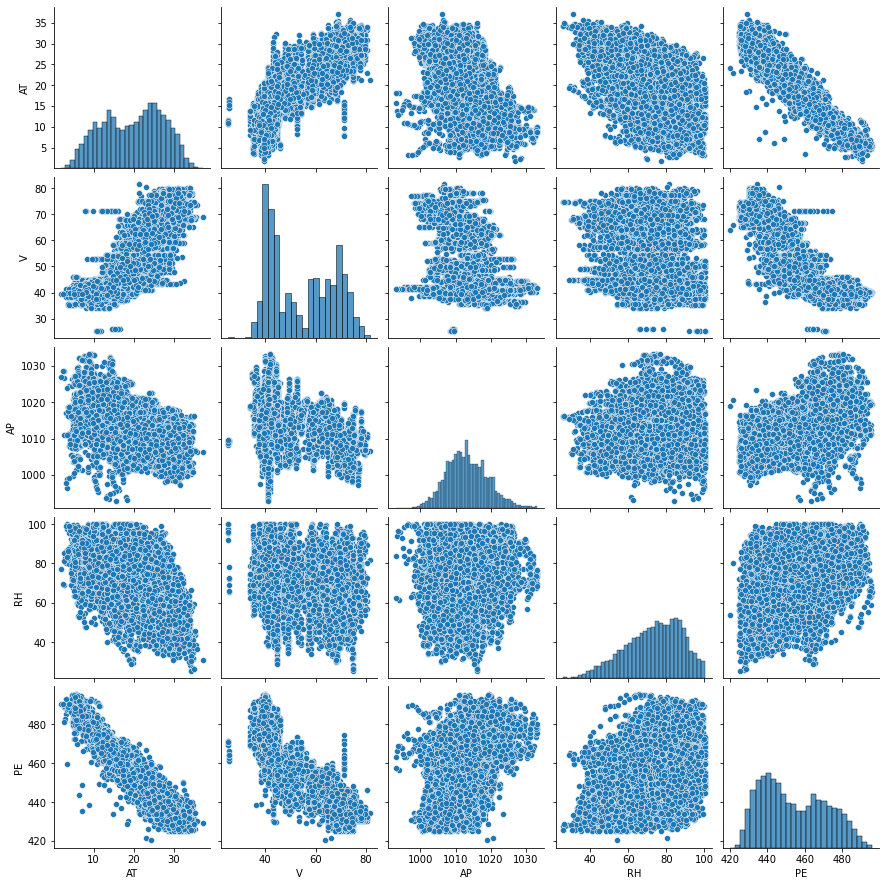

In [566]:
## pairwise scatter
sns.pairplot(data)


We can discover the relationship between the IVs and DV by looking at the bottom graphs.

Graph shows a inverse relationship between IV AT(Temperature) and the DV energy output. The higher the temperature is, relatively speaking, the lower the energy output.

Weaker inverse relationship happens between IV exhaust Vacuum and the DV energy output. There are weaker correlations for V to PE when comparing to AT to PE.

AP displays a much weaker positive correlation to energy output. The datapoints spreads are broader. However, if we were to make a comment about the relationship, we would say that the higher Ambient Pressure, the more energy output.

As for Relative Humidity, the relationship cannot be easily defined. Datapoints spreads are everywhere. All values of RHs can produce all variance of energy output.


#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [567]:
stattable = data.describe()
## compute interquartile range
IQR = data.quantile(0.75) - data.quantile(0.25)
Range = data.max() - data.min()

stattable.loc['IQR'] = IQR
stattable.loc['Range'] = Range

## Rename 50% to Median.25% to 1st Quartile, 75% to 3rd Quartile
stattable.rename(index={'50%':'Median'}, inplace=True)
stattable.rename(index={'25%':'1st Quartile'}, inplace=True)
stattable.rename(index={'75%':'3rd Quartile'}, inplace=True)

## Remove std and count and min and max
stattable.drop(['std', 'count', 'min', 'max'], axis=0, inplace=True)

display(stattable)


,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
1st Quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
Median,20.345000,52.080000,1012.940000,74.975000,451.550000
3rd Quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000
Range,35.300000,56.200000,40.410000,74.600000,75.500000


### (c) Simple Linear Regression

For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

## Predictor AT(Ambient Temperature)

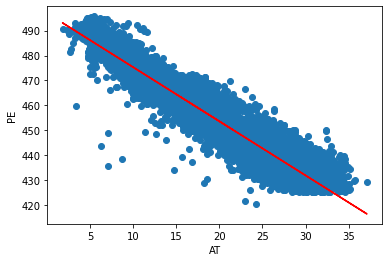

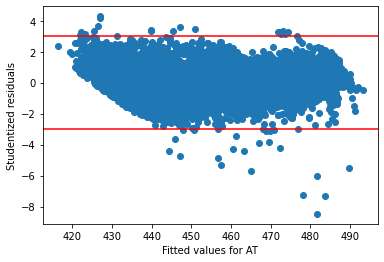

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:30:46   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

In [568]:
## simple linear regression model
X = data['AT']
##plot show outlier


y = data['PE']
X1 = sm.add_constant(X)
model = sm.OLS(y, X1).fit()
predictions = model.predict(X1)


plt.scatter(X, data['PE'])
plt.plot(X, predictions, color='red')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()


##find outlier using studentized residuals graphically
plt.scatter(predictions, model.resid_pearson)
plt.axhline(y=3, color='r', linestyle='-')
plt.axhline(y=-3, color='r', linestyle='-')
plt.xlabel('Fitted values for AT')
plt.ylabel('Studentized residuals')
plt.show()


print(model.summary())

coefficientsAT = model.params


## Predictor AP(Ambient Pressure)

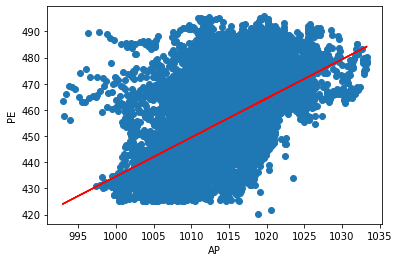

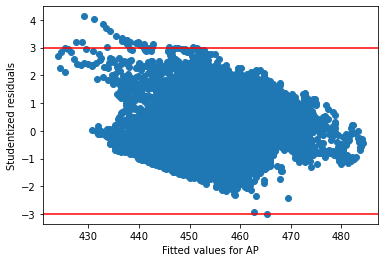

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:30:46   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

In [569]:
## simple linear regression model
X = data['AP']
##plot show outlier


y = data['PE']
X1 = sm.add_constant(X)
model = sm.OLS(y, X1).fit()
predictions = model.predict(X1)


plt.scatter(X, data['PE'])
plt.plot(X, predictions, color='red')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()


##find outlier using studentized residuals graphically
plt.scatter(predictions, model.resid_pearson)
plt.axhline(y=3, color='r', linestyle='-')
plt.axhline(y=-3, color='r', linestyle='-')
plt.xlabel('Fitted values for AP')
plt.ylabel('Studentized residuals')
plt.show()


print(model.summary())

coefficientsAP = model.params

## Predictor RH(Relative Humidity)

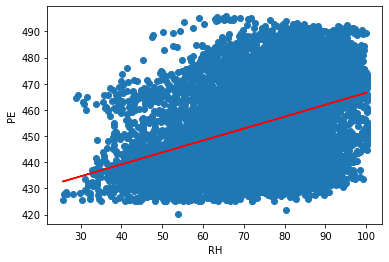

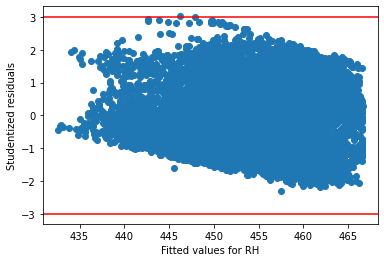

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:30:46   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

In [570]:
## simple linear regression model
X = data['RH']
##plot show outlier

y = data['PE']
X1 = sm.add_constant(X)
model = sm.OLS(y, X1).fit()
predictions = model.predict(X1)


plt.scatter(X, data['PE'])
plt.plot(X, predictions, color='red')
plt.xlabel('RH')
plt.ylabel('PE')
plt.show()


##find outlier using studentized residuals graphically
plt.scatter(predictions, model.resid_pearson)
plt.axhline(y=3, color='r', linestyle='-')
plt.axhline(y=-3, color='r', linestyle='-')
plt.xlabel('Fitted values for RH')
plt.ylabel('Studentized residuals')
plt.show()


print(model.summary())

coefficientsRH = model.params

## Predictor V (Exhaust Vacuum)

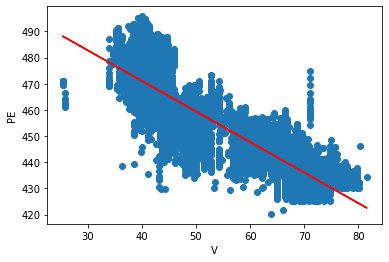

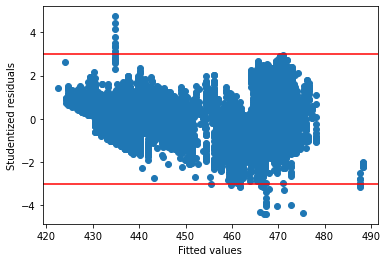

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:30:47   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

In [571]:
## simple linear regression model
X = data['V']
##plot show outlier


y = data['PE']
X1 = sm.add_constant(X)
model = sm.OLS(y, X1).fit()
predictions = model.predict(X1)


plt.scatter(X, data['PE'])
plt.plot(X, predictions, color='red')
plt.xlabel('V')
plt.ylabel('PE')
plt.show()


##find outlier using studentized residuals graphically
plt.scatter(predictions, model.resid_pearson)
plt.axhline(y=3, color='r', linestyle='-')
plt.axhline(y=-3, color='r', linestyle='-')
plt.xlabel('Fitted values')
plt.ylabel('Studentized residuals')
plt.show()


print(model.summary())

coefficientsV = model.params

Here I generated 4 simple linear regression model to predict the response. According to all the p values of the predictors, they are all statistically significant. (P value < 0.05). As we can see from the graphs plotting all of the actual values of predictors and the regression line, we can see that there are strong correlations for Ambient Temperature, Exhaust Vaccum to the Energy Output, and weak correlations for Ambient Pressure, Relative Humidity to the energy output. We can also see this from the R squared values generated in the summary table, since Ambient Pressure and Relative Humidity have very low R square values.

As for outliers, I generated the studentized residual graphs according to the instructions in the textbook. Anything that is outside of the two red lines are considered to be outliers and I would argue to be removed. However, care should be taken since an outlier may instead indicate a deficiency with the model as there might be missing predictors in the model.

### (d) Multiple Regression

Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

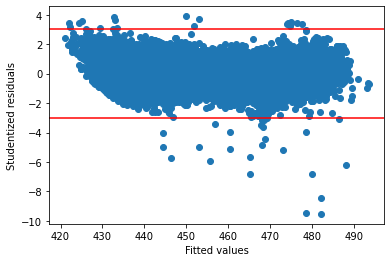

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:30:47   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [572]:
## multiple linear regression model
X = data[['AT', 'AP', 'RH', 'V']]

y = data['PE']
X1 = sm.add_constant(X)
model = sm.OLS(y, X1).fit()
predictions = model.predict(X1)


##find outlier using studentized residuals graphically
plt.scatter(predictions, model.resid_pearson)
plt.axhline(y=3, color='r', linestyle='-')
plt.axhline(y=-3, color='r', linestyle='-')
plt.xlabel('Fitted values')
plt.ylabel('Studentized residuals')
plt.show()


print(model.summary())

##extract coefficients from model
multi_coef = model.params


As we can see, all four predictors' p values are below the 0.05 threshold which means that the probability of seeing a t statistic extremer than what was observed (assuming that βi = β) is very small, therefore we can reject the null hypothesis. (H0) --> Innocent until proven Guilty 

### (e) 1c Compare to 1d

How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

    Simple Linear Coefficients  Multiple Linear Coefficients
AT                   -2.171320                     -1.977513
AP                    1.489872                      0.062083
RH                    0.455650                     -0.158054
V                    -1.168135                     -0.233916


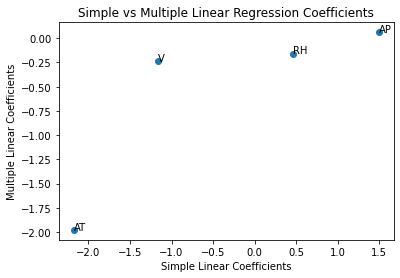

In [573]:
## creating series to store coefficients
coefficients = pd.DataFrame([coefficientsAT[1], coefficientsAP[1], coefficientsRH[1], coefficientsV[1]])
##index of coefficients
coefficients.index = ['AT', 'AP', 'RH', 'V']
coefficients.columns = ['Simple Linear Coefficients']
## add new column
coefficients['Multiple Linear Coefficients'] = multi_coef[1:]

print(coefficients)

# print(coefficients)
# ##= pd.Series([coefficientsAT[1], coefficientsAP[1], coefficientsRH[1], coefficientsV[1]])

# multi_c = pd.Series([multi_coef[1], multi_coef[2], multi_coef[3], multi_coef[4]])

# x as simple linear regression coefficients and y as multiple linear regression coefficients
x = coefficients['Simple Linear Coefficients']
y = coefficients['Multiple Linear Coefficients']

## plot
plt.scatter(x, y)
plt.xlabel('Simple Linear Coefficients')
plt.ylabel('Multiple Linear Coefficients')
plt.title('Simple vs Multiple Linear Regression Coefficients')
## label each point
for i, txt in enumerate(coefficients.index):
    plt.annotate(txt, (x[i], y[i]))
plt.show()


We can see that for AT the coefficients value didn't change that much. There's a huge drop in coefficient values for AP and making its multiple linear coeff close to 0, weakening its effects on the overall multi linear model, the same goes for V and RH but these two experiance smaller changes.

### (f) Nonlinear Association

Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form2
Y =β0 +β1X+β2X2 +β3X3 +ε

Predictor AT

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:30:47   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
x1            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
x2            -0.1251      0.007    -18.199      0.000      -0.139      -0.112
x3             0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

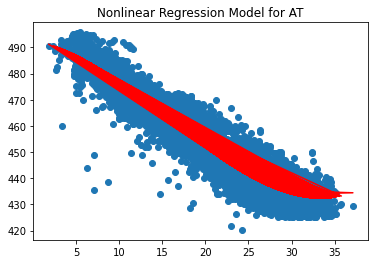

In [574]:
p = PolynomialFeatures(degree =3)
X_AT = data['AT'].values.reshape(-1, 1)
P_AT = p.fit_transform(X_AT)

y = data['PE']
model1 = sm.OLS(y, P_AT).fit()
predictions = model1.predict(P_AT)

plt.scatter(X_AT, y)
plt.plot(X_AT, predictions, color='red')
plt.title("Nonlinear Regression Model for AT")

model1.summary()


Predictor AP

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:30:47   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.000       0.057       0.092
x1            25.2556      3.001      8.415      0.000      19.372      31.139
x2            -0.0500      0.006     -8.439      0.000      -0.062      -0.038
x3          2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

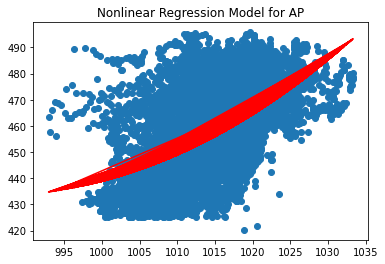

In [575]:
p = PolynomialFeatures(degree =3)
X_AP = data['AP'].values.reshape(-1, 1)
P_AP = p.fit_transform(X_AP)

y = data['PE']
model2 = sm.OLS(y, P_AP).fit()
predictions = model2.predict(P_AP)

plt.scatter(X_AP, y)
plt.plot(X_AP, predictions, color='red')
plt.title("Nonlinear Regression Model for AP")

model2.summary()

Predictor RH

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:30:48   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.000     447.744     489.083
x1            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
x2             0.0321      0.007      4.433      0.000       0.018       0.046
x3            -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

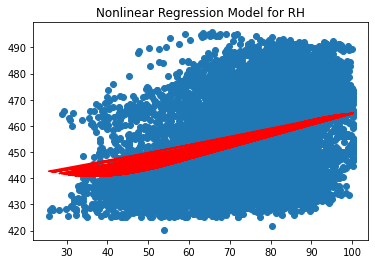

In [576]:
p = PolynomialFeatures(degree =3)
X_RH = data['RH'].values.reshape(-1, 1)
P_RH = p.fit_transform(X_RH)

y = data['PE']
model3 = sm.OLS(y, P_RH).fit()
predictions = model3.predict(P_RH)

plt.scatter(X_RH, y)
plt.plot(X_RH, predictions, color='red')
plt.title("Nonlinear Regression Model for RH")

model3.summary()

Predictor V

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:30:48   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
x1            -2.1444      0.509     -4.214      0.000      -3.142      -1.147
x2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
x3             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

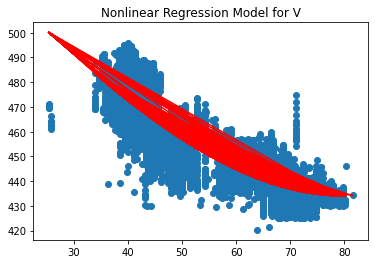

In [577]:
p = PolynomialFeatures(degree =3)
X_V = data['V'].values.reshape(-1, 1)
P_V = p.fit_transform(X_V)

y = data['PE']
model4 = sm.OLS(y, P_V).fit()
predictions = model4.predict(P_V)

plt.scatter(X_V, y)
plt.plot(X_V, predictions, color='red')
plt.title("Nonlinear Regression Model for V")

model4.summary()


I would argue that there exists nonlinear association for the two predictors Ambient Temperature and Exhaust Vaccum to the Energy Output (Response) based on the R square value. We can reject the null hypothesis for AT AP and RH since their p values are all below the 0.05 threshhold. For V, even though the second term comes out to be statistically insignificant (p > 0.05), the higher degree term dominates here.

### (g) Interactions of Predictors

In [578]:
FullLR = sm.OLS.from_formula("PE ~ AT + V + AP + RH + (AT * V) + (AT * AP) + (AT * RH) + (V * AP) + (V * RH) + (AP *RH)", data=data).fit()
##FullLR = sm.OLS.from_formula("PE ~ AT + V + AP + RH + (AT * V) + (V * AP) + (AP * RH)", data=data).fit()
print(FullLR.summary())

#check for multicollinearity
X = add_constant(data[['AT', 'V', 'AP', 'RH']])
display(pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns))




                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:30:48   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

const    43761.151866
AT           5.977602
V            3.943003
AP           1.452639
RH           1.705290
dtype: float64

The two pairwise interaction terms that are not statistically significant are AT:AP and V:RH, hence we reject the null hypothesis H0, which also indicates that there is strong evidence for HA : coefficients for these two interaction terms are not 0. I've also created the variance inflation factors by the guidance of the textbook and I found that AT and V has a high ViF value. Although the book says that values above 5 indicate a probamatic amount of collinearity, I found that even though V has a ViF of 3, by looking at the P values we see that it has a collinearity relationship with RH.

### (h) Improvement

Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

1. Model with just the predictors. 

2. Model with the predictors + quadratic polynomials + Interactions between predictors.

3. Model with the predictors + quadratic polynomials + Interactions between predictors after removing the insignificant terms.


In [579]:
## Creating train dataset from data

## randomly shuffle data
## randomly select 70% of data as train, 30% as test using train_test_split
Train, Test = train_test_split(data, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data[['AT', 'V', 'AP', 'RH']], data['PE'], test_size=0.3, random_state=42)


Formula_1 = "PE ~ AT + V + AP + RH"
Formula_2 = "PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + (AT * V) + (AT * AP) + (AT * RH) + (V * AP) + (V * RH) + (AP *RH)"

## First model linear regression on 70% of data
model1 = sm.OLS.from_formula(Formula_1, data=Train).fit()
train_MSE = mean_squared_error(y_train, model1.predict(X_train))
test_MSE = mean_squared_error(y_test, model1.predict(X_test))

## data frame to store MSE
MSE = {'Model': 'All Predictors linear regression','Train MSE': [train_MSE], 'Test MSE': [test_MSE]}
MSE = pd.DataFrame(MSE)
display(MSE)
print(model1.summary())





,Model,Train MSE,Test MSE
0,All Predictors linear regression,20.58084,21.239857


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:30:48   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    467.8414     11.502     40.673      0.0

Model 2 with all main terms and quadratic terms and all interaction terms

In [580]:
model2 = sm.OLS.from_formula(Formula_2, data=Train).fit()
train_MSE = mean_squared_error(y_train, model2.predict(X_train))
test_MSE = mean_squared_error(y_test, model2.predict(X_test))

## append MSE to data frame
MSE = MSE.append({'Model': 'All Predictors quadratic regression','Train MSE': train_MSE, 'Test MSE': test_MSE}, ignore_index=True)
# MSE = {'Model': 'IT+QUAD+MAIN linear regression','Train MSE': [train_MSE], 'Test MSE': [test_MSE]}

display(MSE)
print(model2.summary())

/var/folders/lr/t56cr6pd4c5f6k7tv_cjmhd80000gn/T/ipykernel_4524/3601431206.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSE = MSE.append({'Model': 'All Predictors quadratic regression','Train MSE': train_MSE, 'Test MSE': test_MSE}, ignore_index=True)


,Model,Train MSE,Test MSE
0,All Predictors linear regression,20.58084,21.239857
1,All Predictors quadratic regression,17.88780,18.647312


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:30:48   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7664.9809   1429.568     

Getting rid of insiginificant variables using p-values

Dropping V^2, V:AP, V:RH


In [581]:
Formula_3 = "PE ~ AT + +V+AP + RH + np.power(AT,2) + np.power(AP,2) + np.power(RH,2) + (AT * V) + (AT * AP) + (AT * RH)+ (AP *RH)"
model3 = sm.OLS.from_formula(Formula_3, data=Train).fit()
train_MSE = mean_squared_error(y_train, model3.predict(X_train))
test_MSE = mean_squared_error(y_test, model3.predict(X_test))

## data frame to store MSE
MSE = MSE.append({'Model': 'Without Insignificant predictors regression model','Train MSE': train_MSE, 'Test MSE': test_MSE}, ignore_index=True)
# MSE = {'Model': 'Without Insignificant predictors regression model','Train MSE': [train_MSE], 'Test MSE': [test_MSE]}
MSE = pd.DataFrame(MSE)
display(MSE)
print(model3.summary())

/var/folders/lr/t56cr6pd4c5f6k7tv_cjmhd80000gn/T/ipykernel_4524/1268090606.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSE = MSE.append({'Model': 'Without Insignificant predictors regression model','Train MSE': train_MSE, 'Test MSE': test_MSE}, ignore_index=True)


,Model,Train MSE,Test MSE
0,All Predictors linear regression,20.580840,21.239857
1,All Predictors quadratic regression,17.887800,18.647312
2,Without Insignificant predictors regression model,17.890843,18.660040


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9258.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:30:48   Log-Likelihood:                -19161.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6685   BIC:                         3.843e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7568.5210   1420.561     

I dont think we can improve from Model 2(Using all possible interaction terms and Quadratic nonlinearities terms) to Model 3, After removing non-significant terms based on its p values, both of our train and test MSE values increased a bit.

### (i) KNN

Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

## Raw Features

Knn model min mse: 15.726819842563568
Knn model optimal k: 5 with MSE Test: 15.726819842563568 and MSE Train: 10.600768887561596


/var/folders/lr/t56cr6pd4c5f6k7tv_cjmhd80000gn/T/ipykernel_4524/2183433835.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSE = MSE.append({'Model': 'Raw Feature KNN Model','Train MSE': MSE_train[opt_index], 'Test MSE': MSE_testmin}, ignore_index=True)


Text(0.5, 1.0, "Raw Feature KNN Model's MSE vs 1/K")

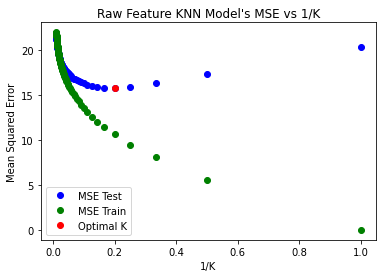

In [582]:

# X_train, X_test, y_train, y_test = train_test_split(data[['AT', 'V', 'AP', 'RH']], data['PE'], test_size=0.3, random_state=42)
#raw features
MSE_test = []
MSE_train = []

for k in range(1, 101):
    knn = KNeighborsRegressor(n_neighbors = k, metric = "euclidean")
    knn.fit(X_train,y_train)
    y_predict = knn.predict(X_test)
    msetest = mean_squared_error(y_test, y_predict)
    y_predict_train = knn.predict(X_train)
    msetrain = mean_squared_error(y_train, y_predict_train)
    
    MSE_test.append(msetest)
    MSE_train.append(msetrain)

MSE_testmin = min(MSE_test)
print("Knn model min mse:", MSE_testmin)

opt_index = MSE_test.index(MSE_testmin)
opt = opt_index + 1
print("Knn model optimal k:", opt,"with MSE Test:", MSE_testmin, "and MSE Train:", MSE_train[opt_index])

## append MSE to data frame
MSE = MSE.append({'Model': 'Raw Feature KNN Model','Train MSE': MSE_train[opt_index], 'Test MSE': MSE_testmin}, ignore_index=True)




x1 =np.array(range(1,101))
plt.plot(1/x1,MSE_test , 'o', color='Blue')
plt.plot(1/x1,MSE_train , 'o', color='Green')
##highlight the lowest point
plt.plot(1/opt,MSE_testmin, 'o', color='Red')
plt.legend(['MSE Test', 'MSE Train', 'Optimal K'])
plt.xlabel('1/K')
plt.ylabel('Mean Squared Error')
plt.title("Raw Feature KNN Model's MSE vs 1/K")

## Normalized Features

Knn model min mse: 14.305669422675024
Knn model optimal k: 4 with MSE Test: 14.305669422675024 and MSE Train: 8.591432839331045


/var/folders/lr/t56cr6pd4c5f6k7tv_cjmhd80000gn/T/ipykernel_4524/2890486858.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSE = MSE.append({'Model': 'Normalized Feature KNN Model','Train MSE': MSE_TrainNorm[opt_index], 'Test MSE': MSE_TestNormmin}, ignore_index=True)


Text(0.5, 1.0, "Normalized Features KNN Model's MSE vs 1/K")

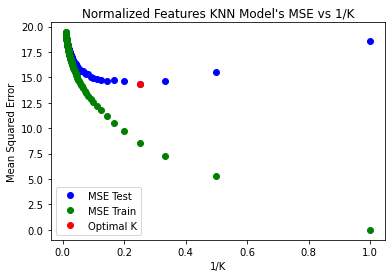

In [583]:
## same model as above but with normalized features
MSE_TestNorm = []
MSE_TrainNorm = []


##Normalize data using sklearn 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)


for k in range(1, 101):
    knn2 = KNeighborsRegressor(n_neighbors = k, metric = "euclidean")
    knn2.fit(X_train_norm,y_train)
    y_predict = knn2.predict(X_test_norm)
    msetest = mean_squared_error(y_test, y_predict)
    y_predict_train = knn2.predict(X_train_norm)
    msetrain = mean_squared_error(y_train, y_predict_train)
    
    MSE_TestNorm.append(msetest)
    MSE_TrainNorm.append(msetrain)


MSE_TestNormmin = min(MSE_TestNorm)
print("Knn model min mse:", MSE_TestNormmin)

opt_index = MSE_TestNorm.index(MSE_TestNormmin)
opt = opt_index + 1
print("Knn model optimal k:", opt,"with MSE Test:", MSE_TestNormmin, "and MSE Train:", MSE_TrainNorm[opt_index])

## append MSE to data frame
MSE = MSE.append({'Model': 'Normalized Feature KNN Model','Train MSE': MSE_TrainNorm[opt_index], 'Test MSE': MSE_TestNormmin}, ignore_index=True)

x1 =np.array(range(1,101))
plt.plot(1/x1,MSE_TestNorm , 'o', color='Blue')
plt.plot(1/x1,MSE_TrainNorm , 'o', color='Green')
##highlight the lowest point
plt.plot(1/opt,MSE_TestNormmin, 'o', color='Red')
plt.legend(['MSE Test', 'MSE Train', 'Optimal K'])
plt.xlabel('1/K')
plt.ylabel('Mean Squared Error')
plt.title("Normalized Features KNN Model's MSE vs 1/K")



### (j ) Compare KNN and Linear

In [584]:
display(MSE)

,Model,Train MSE,Test MSE
0,All Predictors linear regression,20.580840,21.239857
1,All Predictors quadratic regression,17.887800,18.647312
2,Without Insignificant predictors regression model,17.890843,18.660040
3,Raw Feature KNN Model,10.600769,15.726820
4,Normalized Feature KNN Model,8.591433,14.305669


The Normalized Feature KNN Model produces both the Lowest TrainMSE and TestMSE.

Non parametric methods such as KNN regression provide a more flexible approach for performing regression.

According to the textbook: In a real-life situation in which the true relationship is unknown, one might draw the conclusion that KNN should be favored over linear regression because it will at worst be slightly inferior than linear regression if the true relationship is linear, and may give substantially better results if the true relationship is non-linear.

From our obesrvations above, there exists a non-linear relationship between the predictors and the response, Hence this KNN regression is a better fit and has lower MSE errors.

However, KNN do not perform well with higher dimensionality, and is something to keep in mind.


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

It woud be better because we have a large amount of samples and less predictors to work with. According to Bias Variance trade-off, a more flexible method imply lower bias, which means the method is more generalized and tend to underfit but would perform better on unseen data since a more strict method would result in overfitting and unseen data will tend to generate larger errors

### (b) The number of predictors p is extremely large, and the number of observations n is small.

It would be worse since we do not have enough samples (sample size small). Therefore a flexible method will overfit the model

### (c) The relationship between the predictors and response is highly non-linear.

Flexible method will perform better than inflexible in this instance since inflexible model has less degrees of freedom.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

Flexible method will incorporate the high variance of the error terms and will in tern have high variance. Therefore a flexible method will perform worse as compared to an inflexible model

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [585]:
X = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]
testpoint = [[0,0,0]]
euclidean_distance_result = euclidean_distances(X, testpoint)
dataframe = pd.DataFrame(euclidean_distance_result)
dataframe.columns = ['Euclidean Distance']
dataframe.index = ['1', '2', '3', '4', '5', '6']
display(dataframe)

,Euclidean Distance
1,3.000000
2,2.000000
3,3.162278
4,2.236068
5,1.414214
6,1.732051


### (b) What is our prediction with K = 1? Why?

For K = 1, the prediction of Y will be Green since Obs 5 has the shortest distance to the test point X1 =  X2 = X3 = 0

### (c) What is our prediction with K = 3? Why?

For K = 3, we choose the cloest 3 obs, which is the three obs that have the shortest distance to the test point. (Obs 5,6,2)

Since there are two red and one green, our prediction comes out to be Red by majority voting.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

We expect the K value to be small because When K becomes larger, we will get a smoother function, here when function is highly non-linear, we would expect K value to be small.

## Reference and Citations:

Mainly from the ISLR Textbook! Super useful!